# StyleGAN2: hi-res generative modeling

## [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ml4a/ml4a-guides/blob/ml4a.net/examples/models/StyleGAN2.ipynb)

StyleGAN2 is a generative model architecture which generates state-of-the-art, high-resolution images. This module is based on the [original code](https://github.com/NVlabs/stylegan2) and [paper](https://arxiv.org/abs/1912.04958) by NVIDIA, and comes with several pre-trained models, as well as functions for sampling from the GAN, generating interpolations, and performing operations on the latent space to achieve style-transfer like effects.

## Set up ml4a and enable GPU

If you don't already have ml4a installed, or you are opening this in Colab, first enable GPU (`Runtime` > `Change runtime type`), then run the following cell to install ml4a and its dependencies.

In [ ]:
%tensorflow_version 1.x
!pip3 install --quiet ml4a

## Load stylegan 

You can see what pre-trained models are available with `stylegan2.get_pretrained_models`.

In [2]:
from ml4a import image
from ml4a.models import stylegan2

stylegan2.get_pretrained_models()

dict_keys(['cars', 'cats', 'churches', 'horses', 'ffhq', 'landscapes', 'wikiarts'])

The variable `network_pkl` refers to the location of the trained pkl file. You can load your own pkl locally from your computer, or get one of the pretrained models listed above.

In [3]:
network_pkl = stylegan2.get_pretrained_model('cats')
stylegan2.load_model(network_pkl, randomize_noise=False)

Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.


## Generate random samples

`stylegan2.random_sample(n)` will generate `n` random images from the latent space of your trained model. If your model is conditional, you must also supply a label vector.

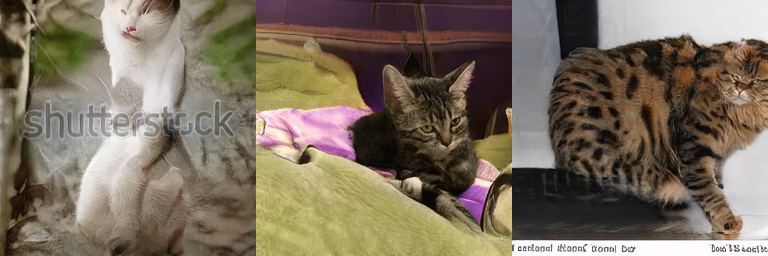

In [4]:
samples, _ = stylegan2.random_sample(3, label=None, truncation=1.0)
image.display(samples)

You can quickly generate a "latent walk" video, a random interpolation through the latent space of your model of `duration_sec` seconds long, with `stylegan2.generate_interpolation_video`.

In [5]:
latent_video = stylegan2.generate_interpolation_video(
    'latent_interpolation.mp4', 
    labels=None,
    truncation=1, 
    duration_sec=5.0
)

t:   4%|▍         | 6/150 [00:00<00:02, 56.19it/s, now=None]

Moviepy - Building video latent_interpolation.mp4.
Moviepy - Writing video latent_interpolation.mp4



Moviepy - Done !
Moviepy - video ready latent_interpolation.mp4


Display the generated video inline in the notebook.

In [6]:
image.display_local(latent_video)